In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import copy

## Linear regression

$\mathcal X=\mathbb R^d$, $\mathcal Y=\mathbb R$,
$$ \|w\|_1:=\sum_{i=1}^d |w_i|,\quad \|w\|_2:=\sqrt{\sum_{i=1}^d |w_i|^2},$$
$$\mathcal H=\{x\mapsto h(x)=\langle w,x\rangle+b\},$$
+ Ordinary linear regression
$$ L_S(h)=\frac{1}{m}\sum_{i=1}^m(\langle w,x_i\rangle+b-y_i)^2\to\min_{w,b}$$
+ Ridge regression
$$ L_S(h)+\lambda\|w\|_2^2\to\min_{w,b}$$
+ Lasso
$$ L_S(h)+\lambda\|w\|_1\to\min_{w,b}$$
+ Elastic net
$$ L_S(h)+\lambda_1\|w\|_2^2+\lambda_2\|w\|_1\to\min_{w,b}$$

Assume that samples correspond to the values of a 3rd order polynomial perturbed by a Gaussian noise:
$$ y_i=x_i^3-5 x_i^2+3 x_i+1+\xi_i,\quad \xi_i\sim N(0,1),\quad x_i\sim U(-1,5)$$
$i\in\{1,\dots,m\}$, $m=30$.

**1. Plot the graph of the unperturbed function and the scatter plot of $(x_i,y_i)$.**

Text(0, 0.5, 'y')

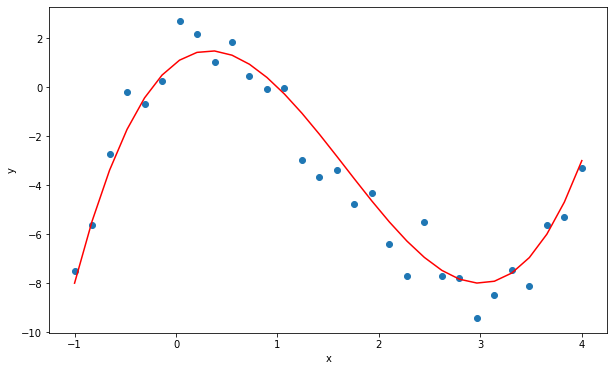

In [16]:
np.random.seed(42)
m = 30
x = np.linspace( -1, 4, m )
xi_i = np.random.normal( 0, 1, size = m ) 
y_real = x**3 - 5*x**2 + 3*x + 1
y = x**3 - 5*x**2 + 3*x + 1 + xi_i

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y_real, 'r', label="y_real")
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')

### Ordinary linear regression
Consider an extended set of features: $\mathbf{x}=(x,x^2,\dots,x^d)$ (`PolynomialFeatures`) and the correspondent linear regression problem:
$$ L_S(h)=\frac{1}{m}\sum_{i=1}^m(\langle\mathbf{w},\mathbf{x}_i\rangle+b-y_i)^2\to\min_{\mathbf{w},b}$$
The hypothesis class
$$\mathcal H_d=\{\mathbf{x}\mapsto h(\mathbf{x})=\langle\mathbf{w},\mathbf{x}\rangle+b\},$$
depends on the hyperparameter $d$. Consider the training errors
$$ \psi(d)=\inf_{\mathbf{w},b} L_S(h)$$
and average cross-validation errors 
$$ \overline\psi(d)=\frac{1}{k}\sum_{i=1}^k\psi_i(d),\quad \psi_i(d)=\inf_{\mathbf{w},b} L_{S\backslash S_i}(h)$$
for different values of $d$. Here $(S_1,\dots,S_d)$ is a partition of $S$, considered in the cross-validation. 

**2. Find $d$ with the best average cross-validation score.** 

Best score d =  3


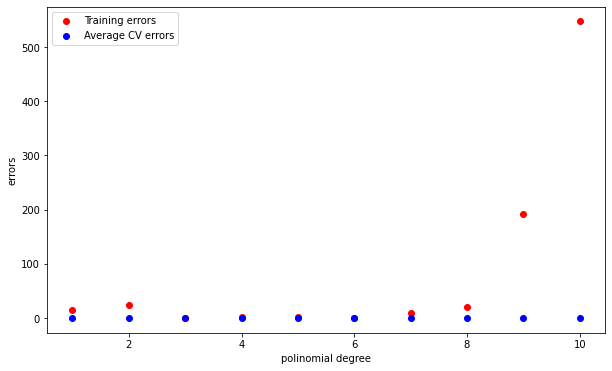

In [20]:
d = [i for i in range(1, 11)] 
arr_err = []
arr_err_train = []

for i in d:
    x_new = copy.deepcopy(x)
    x_new = x_new.reshape( -1, 1 )
    poly = PolynomialFeatures( i, include_bias=False )
    new_p = poly.fit_transform(x_new)
    lr = LinearRegression()
    scores = cross_val_score(lr, new_p, y, cv=10)
    err = np.mean(-scores)
    
    lr = LinearRegression()
    err_train = lr.fit(new_p, y)
    err_train = err_train.score(new_p, y)
    
    arr_err.append(err)
    arr_err_train.append(err_train)
    

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(d,arr_err, c='r')
ax.scatter(d,arr_err_train, c='b')
ax.legend(['Training errors','Average CV errors'])
ax.set_xlabel('polinomial degree')
ax.set_ylabel('errors')
print("Best score d = ",np.argmin(arr_err)+1)

**3. (a) Compute the training error of this predictor for the RMSE (root mean square error) evaluation metrics. Compare with the standard deviation of the data. (b) By the means of scatter plots compare the coefficients of the best predictor and the original coefficients.** 

0.7936490700263202
[1.1609138044827279, 2.472032106794371, -4.947212869665643, 1.0154190835427412]


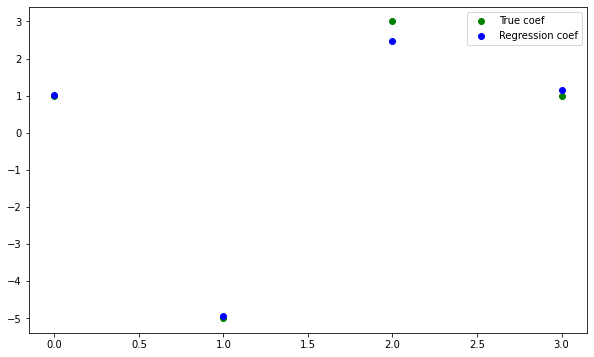

In [23]:
poly = PolynomialFeatures(3, include_bias = False)
p = poly.fit_transform(x_new)
reg = LinearRegression()
reg.fit(p, y)

rmse = mean_squared_error(reg.predict(p), y, squared=False)
print(rmse)

res3 = []
res3.extend([reg.intercept_])
res3.extend(reg.coef_)
print(res3)
true_coef = [1, 3, -5, 1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter([i for i in range(4)], true_coef[::-1], c='g')
ax.scatter([i for i in range(4)], res3[::-1], c='b')
ax.legend(['True coef', 'Regression coef'])

**4. Show the graphs of the predictors for d=3 and d=10 along with the unperturbed original function.**

[1.1609138044827279, 2.472032106794371, -4.947212869665643, 1.0154190835427412]
[1.444726765285537, 2.6129941873282094, -3.974750102620582, 0.13471763892210795, -4.013554591659442, 3.2339466491934936, 1.4624676447281364, -2.3455114724484796, 0.9578543509608433, -0.16924653716789173, 0.011241216512550611]


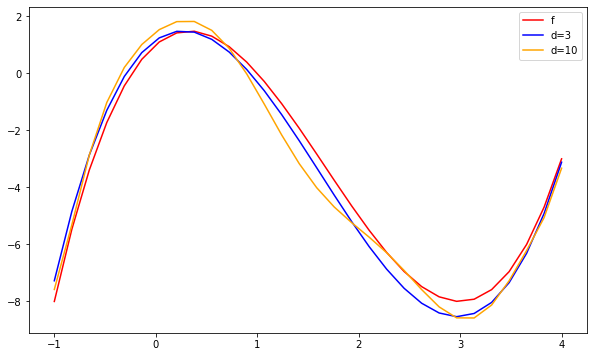

In [26]:
poly = PolynomialFeatures(10, include_bias = False)
p10 = poly.fit_transform(x_new)
reg10 = LinearRegression()
reg10.fit(p10, y)

res10 = []
res10.extend([reg10.intercept_])
res10.extend(reg10.coef_)

print(res3)
print(res10)

y3 = np.polynomial.Polynomial(res3)
y10 = np.polynomial.Polynomial(res10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y_real, 'r')
ax.plot(x,y3(x), 'b')
ax.plot(x,y10(x), 'orange')
ax.legend(['f', 'd=3', 'd=10'])

### Ridge regression
Objective function in scikit-learn:
$$ m\cdot L_S(h)+\alpha\|w\|_2^2$$
**5. (a) Take a class polynomials, having a fixed large degree ($d=10$) and select the best regularization parameter $\alpha$. Compute the training error for the RMSE evaluation metrics for the best 
$\alpha$.**  

Consider log-scale for $\alpha$:
`alphas=np.logspace(a_1,a_2,N=50,endpoint=True,b=10.0)`: 
$$ z_i=a_1+\frac{a_2-a_1}{N-1}i,\quad i=0,\dots,N-1,$$
$$ \alpha_i=b^{z_i},\quad i=0,\dots,N-1.$$
Note that the difference
$$ \log_b \alpha_{i+1}-\log_b(\alpha_i)=z_{i+1}-z_i=\frac{a_2-a_1}{N-1}$$
is constant.

**5. (b) Show the dependence of the training and cross-validation errors on the regularization parameter**

In [28]:
alphas=np.logspace(0,3.61,50,endpoint=True)
param_grid = {'alpha' : alphas}
lr_reg = Ridge()
grid = GridSearchCV(estimator=lr_reg, param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p10, y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best regularization parameter:  1.0
RMSE for the best Ridge regression predictor:  0.872027074077251


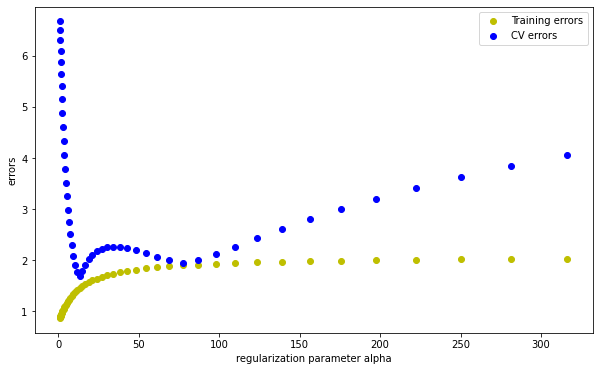

In [32]:
poly = PolynomialFeatures(10, include_bias = False)
p = poly.fit_transform(x_new)

alphas=np.logspace(0,2.5, 50,endpoint=True)

train_error = []
cv_error = []
for i in alphas:
    lr_reg = Ridge(alpha=i)
    lr_reg.fit(p, y)
    train_error.append(mean_squared_error(lr_reg.predict(p), y, squared=False))
    
    scores = cross_val_score(Ridge(alpha=i), p, y, cv=10 , scoring = 'neg_root_mean_squared_error')
    cv_error.append(-np.mean(scores))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(alphas,train_error, c='y')
ax.scatter(alphas,cv_error, c='b')
ax.legend(['Training errors','CV errors'])
ax.set_xlabel('regularization parameter alpha')
ax.set_ylabel('errors')
print("Best regularization parameter: ", grid_result.best_estimator_.alpha)
print("RMSE for the best Ridge regression predictor: ", mean_squared_error(grid_result.predict(p), y, squared=False))

**6. Show the graphs of the best Ridge predictor along with the graph of the unperturbed original function.**

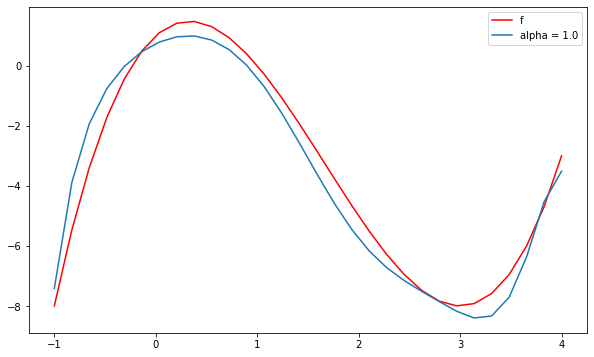

In [34]:
a = grid_result.best_estimator_.alpha
lr_reg = Ridge(alpha=a)
lr_reg.fit(p, y)
predict_alpha = lr_reg.predict(p)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y_real,'r')
ax.plot(x,predict_alpha)
s = 'alpha = '+str(a)
ax.legend(['f', s])

### Lasso regression
Objective function in scikit-learn:
$$ \frac{1}{2}L_S(h)+\alpha\|w\|_1.$$
**7. The problem is the same as 5, 6 for Ridge regression.**

In [35]:
alphas=np.logspace(0,3.61,50,endpoint=True)
param_grid = {'alpha' : alphas}
lr_reg = Lasso(max_iter=10000)
grid = GridSearchCV(estimator=lr_reg, param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p10, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.670e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.161e+01, tolerance: 3.647e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.678e+01, tolerance: 3.830e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.650e+01, tolerance: 3.552e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.380e+01, tolerance: 3.779e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.185e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.082e+01, tolerance: 3.177e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+01, tolerance: 3.704e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.003e+01, tolerance: 3.117e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.181e+01, tolerance: 3.215e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.965e+01, tolerance: 3.647e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.639e+01, tolerance: 3.443e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.350e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.114e+01, tolerance: 3.647e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.074e+01, tolerance: 3.215e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.220e+01, tolerance: 3.779e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.920e+01, tolerance: 3.830e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.727e+01, tolerance: 3.552e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.095e+01, tolerance: 3.443e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.540e+01, tolerance: 2.776e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.453e+01, tolerance: 3.117e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.572e+01, tolerance: 3.215e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.571e+01, tolerance: 3.704e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.592e+01, tolerance: 3.830e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.188e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+01, tolerance: 3.647e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.180e+01, tolerance: 3.552e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.928e+01, tolerance: 3.117e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.790e+01, tolerance: 3.177e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.875e+01, tolerance: 3.704e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.262e+01, tolerance: 3.443e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.527e+01, tolerance: 2.776e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.722e+01, tolerance: 3.779e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.621e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.294e+01, tolerance: 3.830e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+01, tolerance: 3.552e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.500e+01, tolerance: 3.177e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.354e+01, tolerance: 3.704e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

Best regularization parameter:  4.6032146264032425
RMSE for the best Lasso regression predictor:  2.1828949479153406


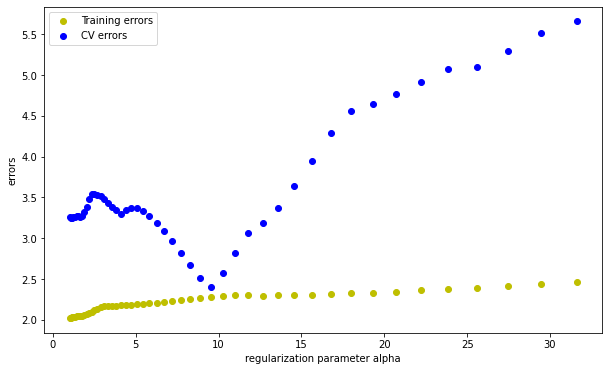

In [36]:
poly = PolynomialFeatures(10, include_bias = False)
p = poly.fit_transform(x_new)

alphas=np.logspace(0,1.5, 50,endpoint=True)

train_error = []
cv_error = []
for i in alphas:
    lr_reg = Lasso(alpha=i, max_iter=10000)
    lr_reg.fit(p, y)
    train_error.append(mean_squared_error(lr_reg.predict(p), y, squared=False))
    
    scores = cross_val_score(Lasso(alpha=i, max_iter=10000), p, y, cv=10 , scoring = 'neg_root_mean_squared_error')
    cv_error.append(-np.mean(scores))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(alphas,train_error, c='y')
ax.scatter(alphas,cv_error, c='b')
ax.legend(['Training errors','CV errors'])
ax.set_xlabel('regularization parameter alpha')
ax.set_ylabel('errors')
print("Best regularization parameter: ", grid_result.best_estimator_.alpha)
print("RMSE for the best Lasso regression predictor: ", mean_squared_error(grid_result.predict(p), y, squared=False))

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


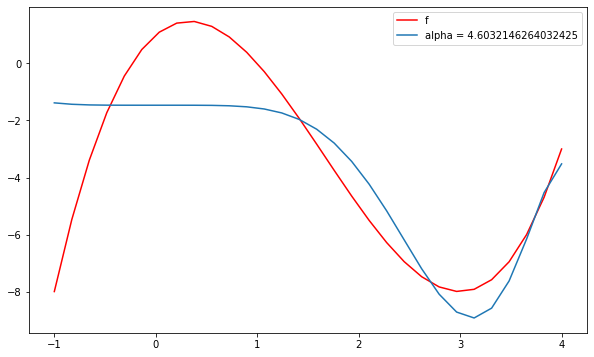

In [37]:
a = grid_result.best_estimator_.alpha
lasso_reg = Lasso(alpha=a, max_iter=10000)
lasso_reg.fit(p, y)
predict_lasso = lasso_reg.predict(p)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y_real,'r')
ax.plot(x,predict_lasso)
s = 'alpha = '+str(a)
ax.legend(['f', s])

## Elastic net
Objective function in scikit-learn: 
$$ \frac{1}{2}L_S(h)+\alpha r \|\mathbf w\|_1+\frac{1}{2}\alpha(1-r)\|\mathbf{w}\|_2^2.$$
**8. Fix some large $d$ and use `GridSearchCV` to find the best combination of $\alpha$ and $r$ (`l1_ratio`).**

In [38]:
alphas=np.logspace(0,3.61,50,endpoint=True)
s = np.linspace(0,1,11)
param_grid = {'alpha' : alphas, 
              'l1_ratio' : s }

lr_elastic = ElasticNet()
grid = GridSearchCV(estimator=lr_elastic, param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_result = grid.fit(p, y)


Fitting 5 folds for each of 550 candidates, totalling 2750 fits


C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.764e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [39]:
print(grid_result.best_estimator_)
print("RMSE for the best papameters:", mean_squared_error(grid_result.predict(p), y, squared=False))

ElasticNet(alpha=2.7672017032884058, l1_ratio=0.6000000000000001)
RMSE for the best papameters: 2.058757604888114


**9. Show the graphs of the best predictor along with the graph of the unperturbed original function.**

C:\Users\Wasya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.764e+01, tolerance: 3.848e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


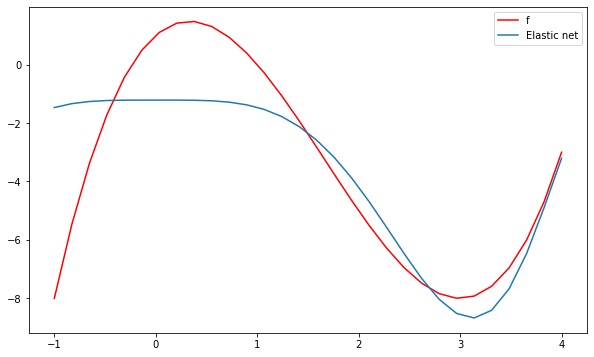

In [40]:
a = grid_result.best_estimator_.alpha
s = grid_result.best_estimator_.l1_ratio
lr_elastic = ElasticNet(alpha=a, l1_ratio=s)

lr_elastic.fit(p, y)
predict_elastic = lr_elastic.predict(p)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y_real,'r')
ax.plot(x,predict_elastic)
ax.legend(['f', 'Elastic net'])

**10. Show the coefficients of the best Lasso and ElasticNet predictors**

[-1.4645116444846438, -0.0, -0.0, -0.0, -0.0, -0.09713126955779203, -0.007872102568278961, 0.008172800360511625, 0.001637643038022838, -6.665721392127494e-05, -8.974569460617289e-05]
[-1.2166369819729606, 0.0, -0.0, -0.0, -0.26789669831614793, 0.002230315241677456, 0.01666904974841848, 0.0016283852059018821, 1.1734061021775506e-05, -4.5025778492869686e-05, -1.870528496181795e-05]


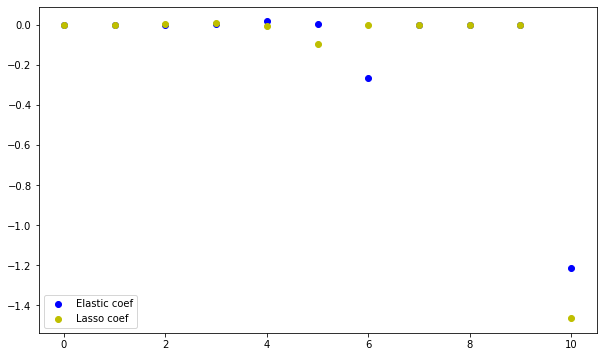

In [41]:
res_lasso = []
res_lasso.extend([lasso_reg.intercept_])
res_lasso.extend(lasso_reg.coef_)

res_elastic = []
res_elastic.extend([lr_elastic.intercept_])
res_elastic.extend(lr_elastic.coef_)

print(res_lasso)
print(res_elastic)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter([i for i in range(11)],res_elastic[::-1], c='b')
ax.scatter([i for i in range(11)],res_lasso[::-1], c='y')
ax.legend(['Elastic coef','Lasso coef'])


